<a href="https://colab.research.google.com/github/Tusharsingh7336/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
# import some basic libaraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## divide dataset into dependent and independent features
# we dont want  customer_id, row no, surname as they are not going to play import role in this
X = dataset.iloc[:,3:13] # all row,from 3rd to 12th column
y = dataset.iloc[:,13] # all the row and 13th column


In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
# feature engeniering
gergraphy = pd.get_dummies(dataset['Geography'],drop_first=True)
gender = pd.get_dummies(dataset['Gender'],drop_first=True)

In [10]:
## concatenate these variables with dataframe
#drop geography and gender
X = X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,gergraphy,gender],axis=1)

In [13]:
#splitting the dataset into train test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
# feature scalling
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
X_test.shape

(2000, 11)

In [22]:
## Part 2 Let's create ANN(Artificial Neural Network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [23]:
## lets initalize ANN
classifier = Sequential()

In [24]:
# lets create input layer
classifier.add(Dense(units=11,activation='relu'))

In [25]:
# add hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [26]:
#add another hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [28]:
# add output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [30]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #by default adam use learning rate of 0.01

In [33]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [34]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3148 - accuracy: 0.8666 - val_loss: 0.3640 - val_accuracy: 0.8466
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8690 - val_loss: 0.3655 - val_accuracy: 0.8501
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3144 - accuracy: 0.8647 - val_loss: 0.3645 - val_accuracy: 0.8459
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3135 - accuracy: 0.8655 - val_loss: 0.3686 - val_accuracy: 0.8512
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3145 - accuracy: 0.8688 - val_loss: 0.3663 - val_accuracy: 0.8497
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3147 - accuracy: 0.8668 - val_loss: 0.3654 - val_accuracy: 0.8501
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3151 - accuracy: 0.8684 - val_loss: 0.3656 - val_accuracy:

In [35]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

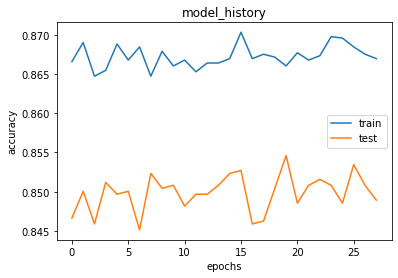

In [39]:
#summarize the history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_history')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

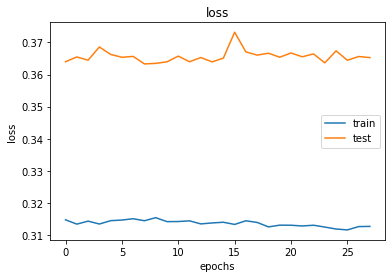

In [40]:
#summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [41]:
# make the prediciton
y_preds = classifier.predict(X_test)
y_preds = (y_preds >= 0.5) # if greater than 0.5 will consider as 1 else 0

63/63 [==============================] - 0s 2ms/step


In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_preds)
cm

array([[1483,  112],
       [ 180,  225]])

In [43]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_preds)
score

0.854

In [44]:
## get the weights
classifier.get_weights()

[array([[ 3.35125974e-03, -2.11072162e-01,  2.64098146e-03,
          4.66568768e-01, -1.41366690e-01, -2.08074316e-01,
         -6.28079325e-02, -6.10583834e-02,  5.31674512e-02,
         -2.20120493e-02,  8.83573852e-03],
        [ 5.70180357e-01, -1.28759706e+00,  4.92708147e-01,
         -6.73918307e-01,  4.15915847e-01, -6.25903785e-01,
          7.79402032e-02,  9.19549167e-01,  8.07936430e-01,
          5.69854736e-01, -3.10510516e-01],
        [ 2.31406584e-01,  1.55060366e-01,  1.47020712e-01,
         -3.55206996e-01,  1.30109549e-01,  1.77600622e-01,
         -1.55912310e-01,  1.43178314e-01, -7.74933621e-02,
          4.17926431e-01,  1.93383917e-02],
        [-8.28899071e-02,  3.24618548e-01,  3.11587423e-01,
         -1.09334014e-01, -3.55831355e-01, -3.85964364e-01,
          1.01851694e-01, -2.52498984e-01, -2.20181897e-01,
         -4.60122317e-01, -8.05400014e-01],
        [-3.94809604e-01, -2.20448568e-01,  1.00454915e+00,
          3.62778872e-01, -1.38401878e+00, -